# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


## Loading  Mtree 

In [3]:
with open ('HMtree.pickle', 'rb') as file:
    HMtree = pickle.load(file)
 

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [4]:
feature_scores = {}

model_details ={}

In [5]:
#HMtree['svr']['Sand']['none']['log'][100]

##  Sand 

#### PLSR

##### Train test

Sand -> [ r2 - **0.67**, Spec - none, n_bands - 7]     <br/><br/>
***Description***: To obtain the best model for sand using plsr method we trained the model on the smoothed spectra which is  resampled to 7 bands.

In [6]:
sand_model_plsr = PLSRegression(n_components=5, scale=True) 
sand_model_plsr.fit(sampled_spec[7],  T[0])

PLSRegression(n_components=5)

In [7]:
feature_scores['Sand'] = permutation_importance(sand_model_plsr, sampled_spec[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'plsr', 'spec': sampled_spec[7], 'spec_proc': 'none', 'n_bands': 7}

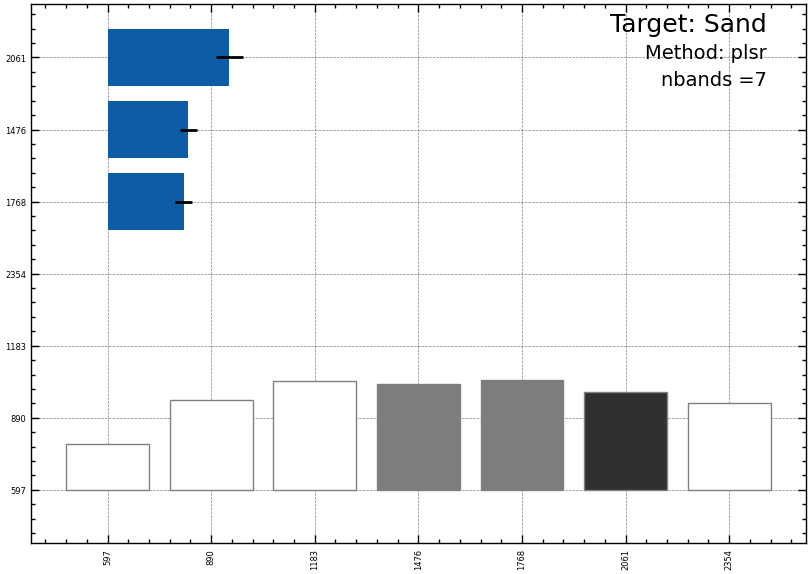

In [8]:
show_important_features_for ('Sand', model_details, feature_scores, 0.005, 4, 2)

#### Leave one out

Sand -> [ r2 - **0.57**, Spec - log, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for sand using plsr method we trained the model on the
 logarithmic of reflectance inverse which is resampled to 7 bands.


In [9]:
sand_model_plsr = PLSRegression(n_components=5, scale=True)  
sand_model_plsr.fit(sampled_log[7],  T[0])

PLSRegression(n_components=5)

In [10]:
feature_scores['Sand'] = permutation_importance(sand_model_plsr, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'plsr', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}

In [11]:
#show_all_important_features_for ('Sand', model_details, feature_scores, 0.005, 1, 2)

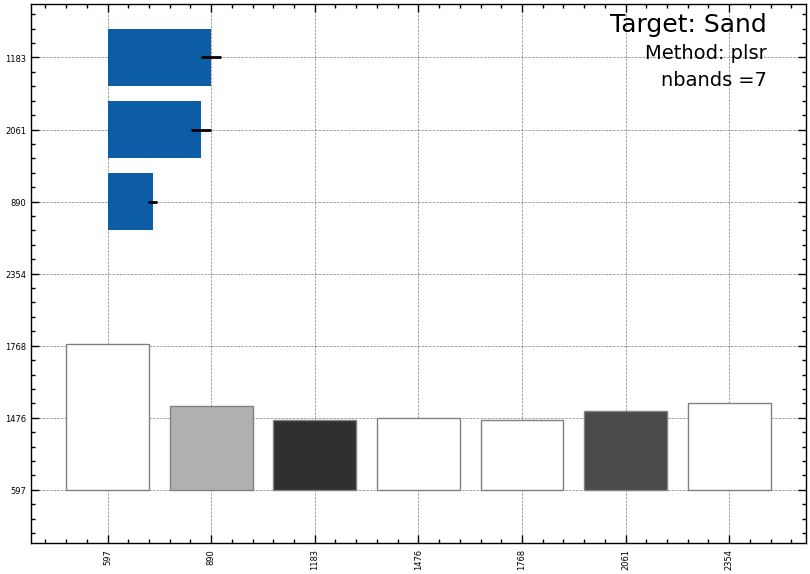

In [12]:
show_important_features_for ('Sand', model_details, feature_scores, 0.005, 1, 2)

#### SVR

#### Train test

Sand -> [ r2 - **0.6**, Spec - log, n_bands -100]     <br/><br/>
***Description***: To obtain the best model for sand using svr method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 100 bands.

In [13]:
sand_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear') 
sand_model_svr.fit(sampled_log[100],  T[0])

SVR(C=10, gamma=0.01, kernel='linear')

In [14]:
feature_scores['Sand'] = permutation_importance(sand_model_svr, sampled_log[100], T[0], n_repeats=30, random_state=0)
model_details['Sand'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}

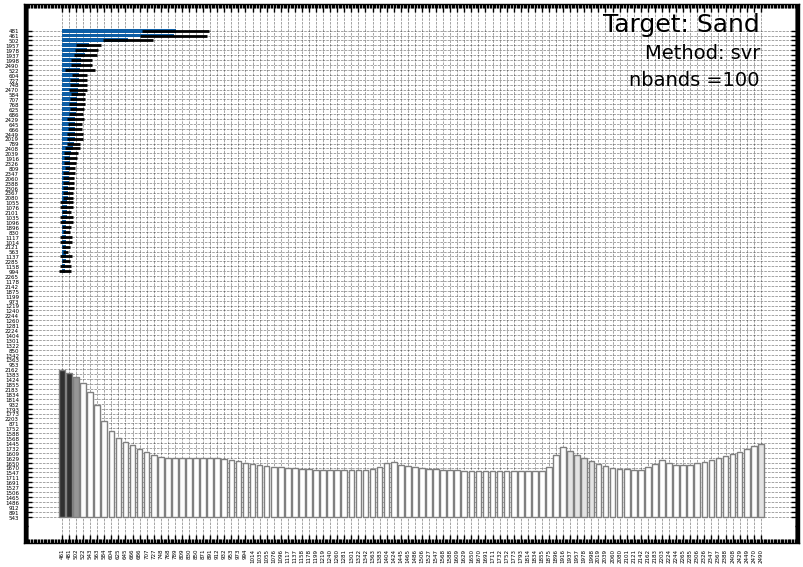

In [15]:
show_important_features_for ('Sand', model_details, feature_scores, 100, 10, 2)

#### Leave one out

Sand -> [ r2 - **0.52**, Spec - log, n_bands -100]     <br/><br/>
***Description***: To obtain the best model for sand using svr method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 100 bands.

In [16]:
sand_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear') 
sand_model_svr.fit(sampled_log[100],  T[0])

SVR(C=10, gamma=0.01, kernel='linear')

In [17]:
feature_scores['Sand'] = permutation_importance(sand_model_svr, sampled_log[100], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}

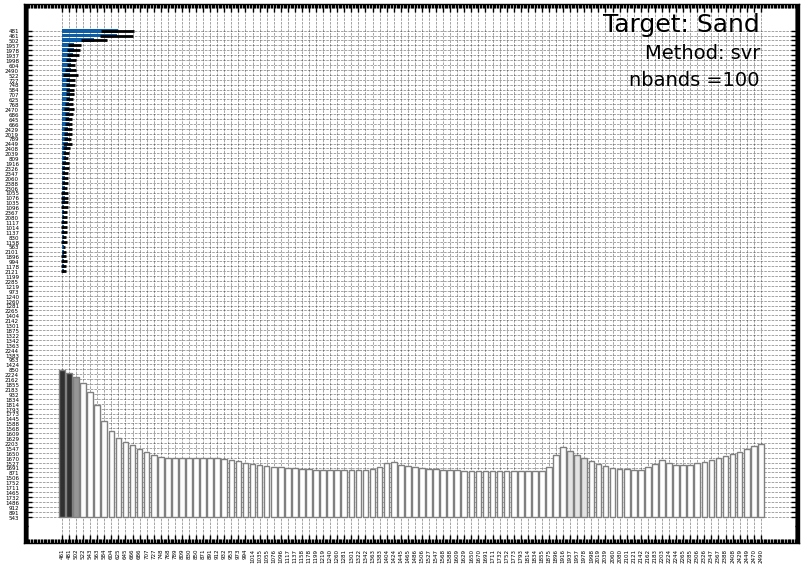

In [18]:
show_important_features_for ('Sand', model_details, feature_scores, 50, 10, 2)

### KernelRidge

#### Train test

Sand -> [ r2 - **0.6**, Spec - log, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 7 bands.

In [19]:
sand_model_kernelridge = KernelRidge(alpha = 0.001) 
sand_model_kernelridge.fit(sampled_log[7],  T[0])

KernelRidge(alpha=0.001)

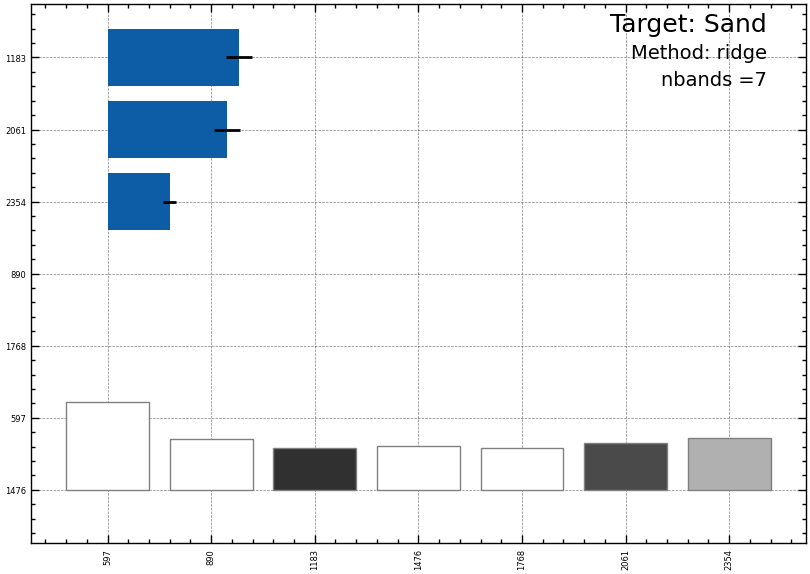

In [20]:
feature_scores['Sand'] = permutation_importance(sand_model_kernelridge, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'ridge', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.005, 0.6, 2)

#### Leave one out

Sand -> [ r2 - **0.55**, Spec - log, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 7 bands.

In [21]:
sand_model_kernelridge = KernelRidge( alpha = 0.001 ) 
sand_model_kernelridge.fit(sampled_log[7],  T[0])

KernelRidge(alpha=0.001)

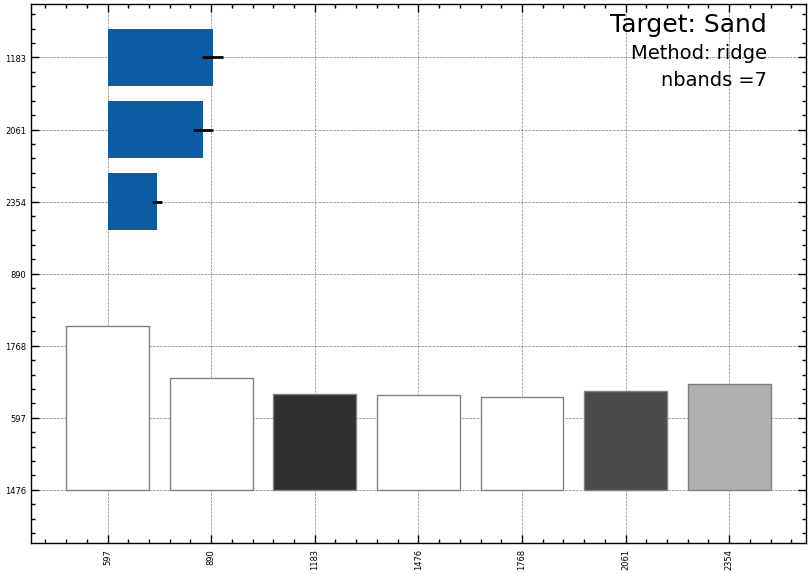

In [22]:
feature_scores['Sand'] = permutation_importance(sand_model_kernelridge, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'ridge', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.004, 1.5, 20)

### Cubist

####  Train test

Sand -> [ r2 - **0.62**, Spec - none, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using cubist method we trained the model on the smoothed spectra which is  resampled to 7 bands.

In [23]:
sand_model_cubist = Cubist(n_committees = 20, n_rules = 10) 
sand_model_cubist.fit(sampled_spec[7],  T[0])

Cubist(n_committees=20, n_rules=10)

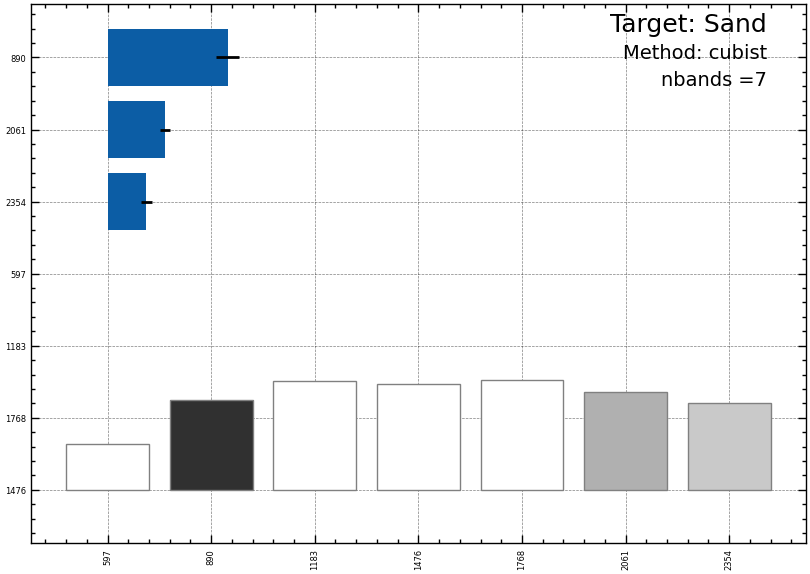

In [24]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_spec[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'cubist', 'spec': sampled_spec[7], 'spec_proc': 'none', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.3, 4, 2)

#### Leave one out

Sand -> [ r2 - **0.59**, Spec - log, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using cubist method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 7 bands.

In [25]:
sand_model_cubist = Cubist( n_committees = 10, n_rules = 10 ) 
sand_model_cubist.fit(sampled_log[7],  T[0])

Cubist(n_committees=10, n_rules=10)

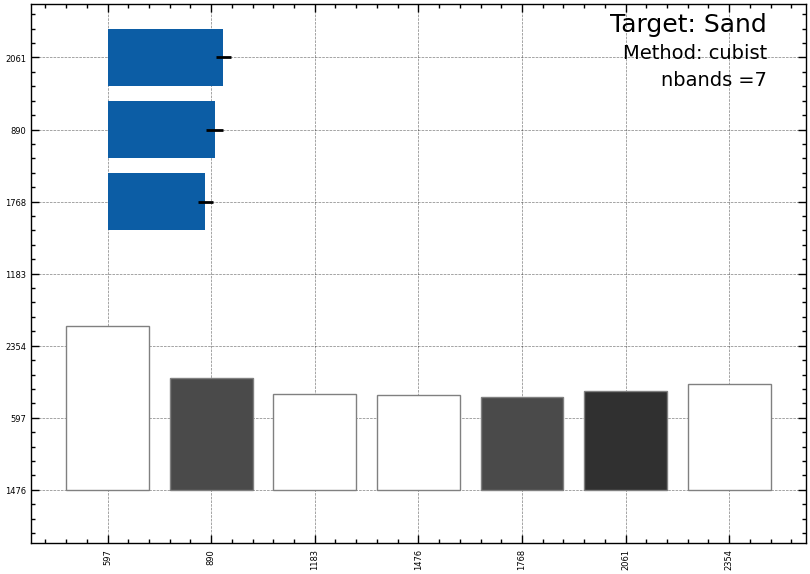

In [26]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'cubist', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.2, 1.5, 20)

### Gradient Boosting Regression Tree

#### Train test

Sand -> [ r2 - **0.53**, Spec - fod2, n_bands -17]     <br/><br/>
***Description***: To obtain the best model for sand using gbrt method we trained the model on the first order derivative of the smoothed spectra which is  resampled to 17 bands.

In [27]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 40, random_state = 42) 
sand_model_gbrt.fit(fod_sampled[17],  T[0])

GradientBoostingRegressor(max_depth=4, n_estimators=40, random_state=42)

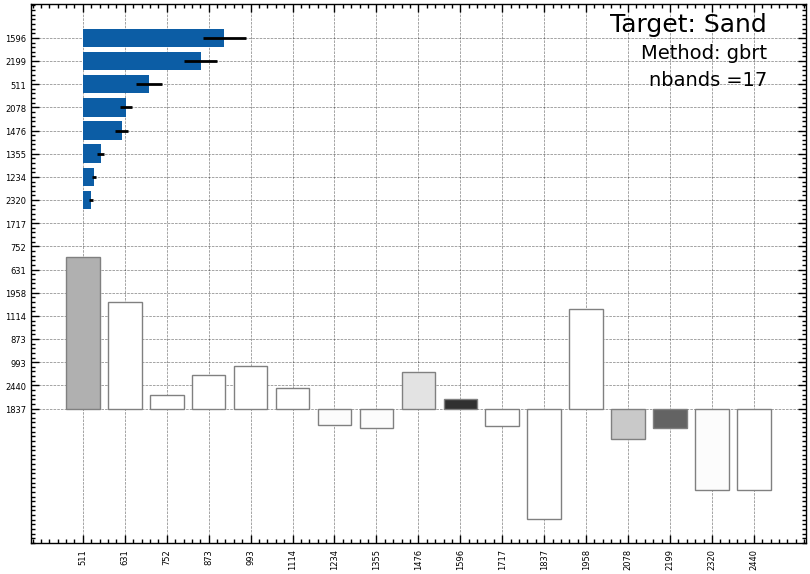

In [28]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled[17], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled[17], 'spec_proc': 'fod2', 'n_bands': 17}
show_important_features_for ('Sand', model_details, feature_scores, 10, 50, 2)

#### Leave one out

Sand -> [ r2 - **0.59**, Spec - fod2, n_bands -39]     <br/><br/>
***Description***: To obtain the best model for sand using gbrt method we trained the model on the first order derivative of the  smoothed spectra which is  resampled to 39 bands.

In [29]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42) 
sand_model_gbrt.fit(fod_sampled[39],  T[0])

GradientBoostingRegressor(n_estimators=50, random_state=42)

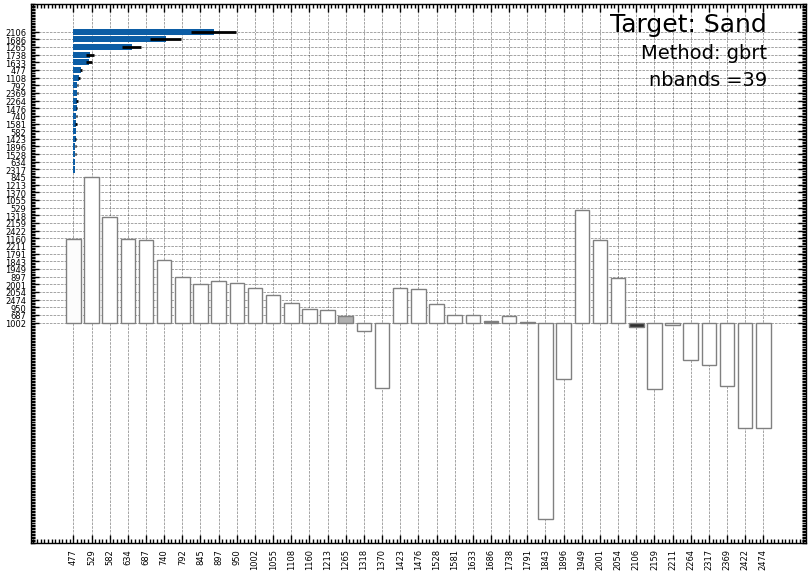

In [30]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled[39], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled[39], 'spec_proc': 'fod2', 'n_bands': 39}
show_important_features_for ('Sand', model_details, feature_scores, 20, 400, 20)

##  Silt 

### PLSR

#### Train test

Silt -> [ r2 - **0.55**, Spec - none, n_bands - 11]     <br/><br/>
***Description***: To obtain the best model for silt using plsr method we trained the model on the smoothed spectra which is  resampled to 11 bands.

In [31]:
silt_model_plsr = PLSRegression(n_components=4, scale=True) 
silt_model_plsr.fit(sampled_spec[11],  T[1])

PLSRegression(n_components=4)

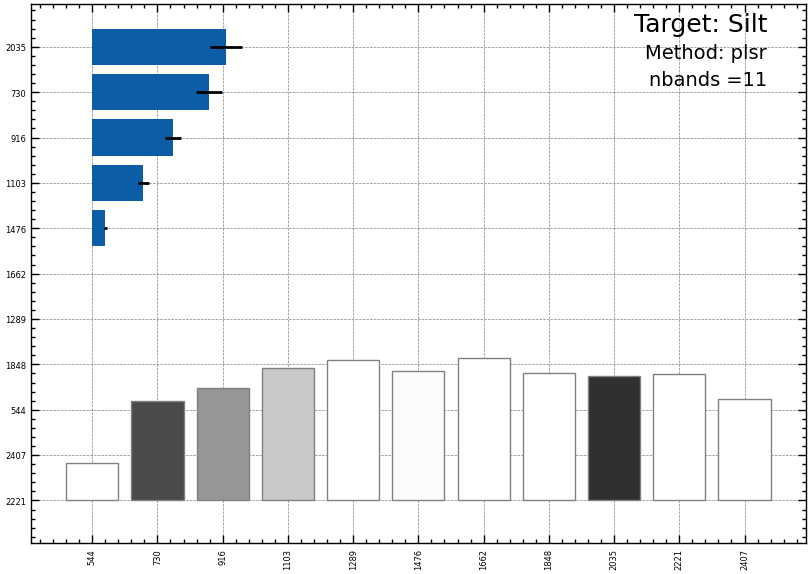

In [32]:
feature_scores['Silt'] = permutation_importance(silt_model_plsr, sampled_spec[11], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'plsr', 'spec': sampled_spec[11], 'spec_proc': 'none', 'n_bands': 11}
show_important_features_for ('Silt', model_details, feature_scores, 0.1, 8, 2)

#### Leave one out

Silt -> [ r2 - **0.35**, Spec - fod2, n_bands - 29]   <br/><br/>
***Description***:To obtain the best model for silt using plsr method we trained the model on the
 first order derivative of the smoothed spectra which is resampled to 29 bands.


In [33]:
silt_model_plsr = PLSRegression(n_components=2, scale=True)  
silt_model_plsr.fit(fod_sampled[29],  T[1])

PLSRegression()

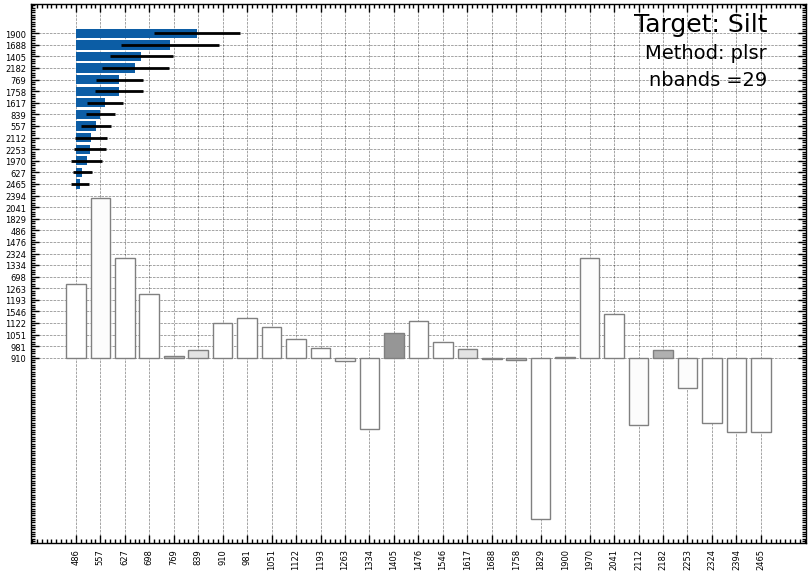

In [34]:
feature_scores['Silt'] = permutation_importance(silt_model_plsr, fod_sampled[29], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'plsr', 'spec': fod_sampled[29], 'spec_proc': 'fod2', 'n_bands': 29}
show_important_features_for ('Silt', model_details, feature_scores, 80, 140, 2)

### SVR

#### Train test

Silt -> [ r2 - **0.35**, Spec - log, n_bands -70]     <br/><br/>
***Description***: To obtain the best model for silt using svr method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 70 bands.

In [35]:
silt_model_svr = SVR(C = 10, gamma = 1, kernel = 'rbf') 
silt_model_svr.fit(sampled_log[70],  T[1])

SVR(C=10, gamma=1)

In [36]:
feature_scores['Silt'] = permutation_importance(silt_model_svr, sampled_log[70], T[1], n_repeats=20, random_state=0)

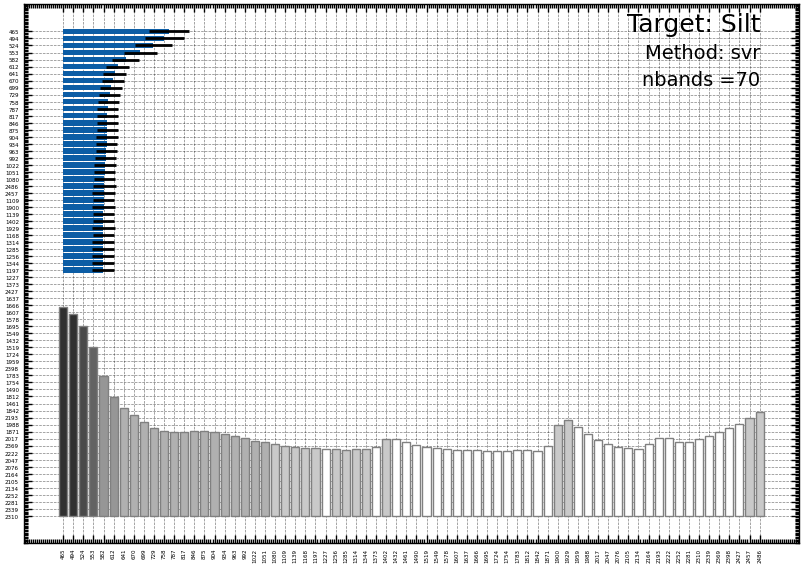

In [37]:
model_details['Silt'] = {'method': 'svr', 'spec': sampled_log[70], 'spec_proc': 'log', 'n_bands': 70}
show_important_features_for ('Silt', model_details, feature_scores, 40, 10, 2)

#### Leave one out

Silt-> [ r2 - **0.31**, Spec - log, n_bands - 90]   <br/><br/>
***Description***:To obtain the best model for silt using svr method we trained the model on the
 logarithmic of the reflectance inverse spectra which is resampled to 90 bands.


In [38]:
silt_model_svr = SVR(C = 10, gamma = 1, kernel = 'rbf') 
silt_model_svr.fit(sampled_log[90],  T[1])

SVR(C=10, gamma=1)

In [39]:
feature_scores['Silt'] = permutation_importance(silt_model_svr, sampled_log[90], T[1], n_repeats=20, random_state=0)

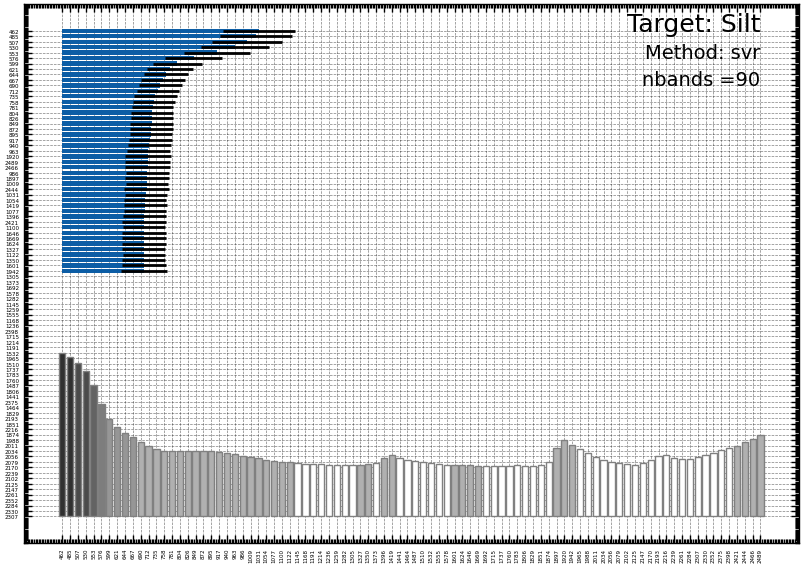

In [40]:
model_details['Silt'] = {'method': 'svr', 'spec': sampled_log[90], 'spec_proc': 'log', 'n_bands': 90}
show_important_features_for ('Silt', model_details, feature_scores.copy(), 100, 10, 2)

###  Kernel Ridge

#### Train test

Silt -> [ r2 - **0.41**, Spec - none, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for silt using kernel ridge regression method we trained the model on the
 smoothed spectra which is resampled to 7 bands.


In [41]:
silt_model_kernelridge = KernelRidge(alpha = 0.0001) 
silt_model_kernelridge.fit(sampled_spec[7],  T[1])

KernelRidge(alpha=0.0001)

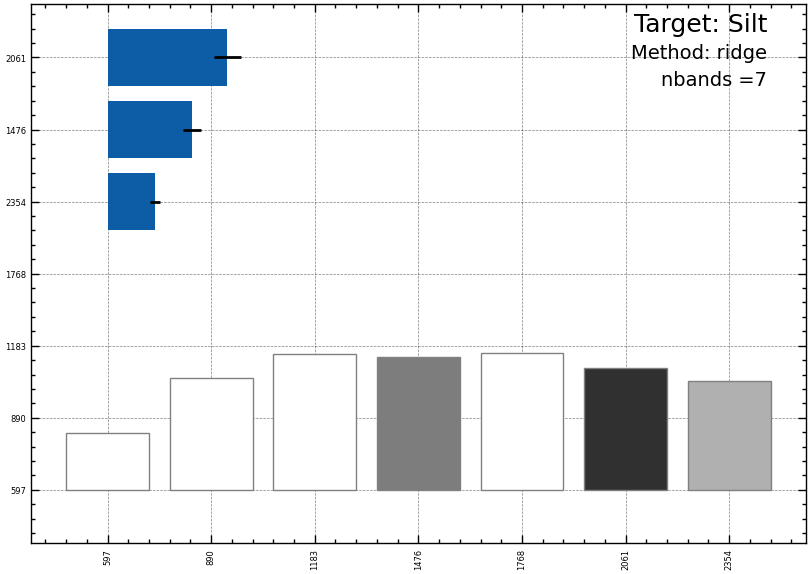

In [42]:
feature_scores['Silt'] = permutation_importance(silt_model_kernelridge, sampled_spec[7], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'ridge', 'spec': sampled_spec[7], 'spec_proc': 'none', 'n_bands': 7}
show_important_features_for ('Silt', model_details, feature_scores, 0.003, 5, 2)

#### Leave one out

Silt -> [ r2 - **0.32**, Spec - none, n_bands - 5]   <br/><br/>
***Description***:To obtain the best model for silt using kernel ridge regression method  we trained the model on the
 smoothed spectra which is resampled to 5 bands.


In [43]:
silt_model_kernelridge = KernelRidge( alpha = 0.00005) 
silt_model_kernelridge.fit(sampled_spec[5],  T[1])

KernelRidge(alpha=5e-05)

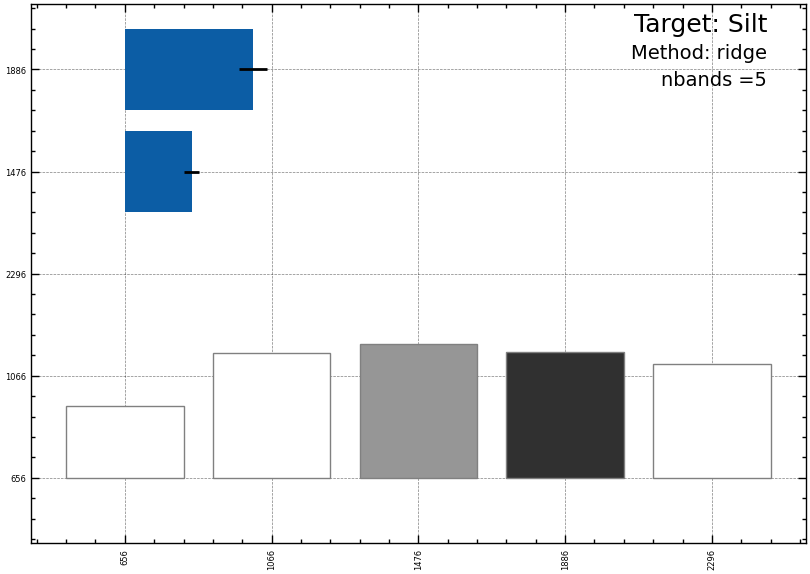

In [44]:
feature_scores['Silt'] = permutation_importance(silt_model_kernelridge, sampled_spec[5], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'ridge', 'spec': sampled_spec[5], 'spec_proc': 'none', 'n_bands': 5}
show_important_features_for ('Silt', model_details, feature_scores, 0.001, 3.5, 2)

### Cubist

#### Train test

Silt -> [ r2 - **0.41**, Spec - fod2, n_bands - 5]   <br/><br/>
***Description***:To obtain the best model for silt using cubist method we trained the model on the
 smoothed spectra which is resampled to 5 bands.


In [45]:
silt_model_cubist = Cubist( n_committees = 5, n_rules = 10) 
silt_model_cubist.fit(fod_sampled[5],  T[1])

Cubist(n_committees=5, n_rules=10)

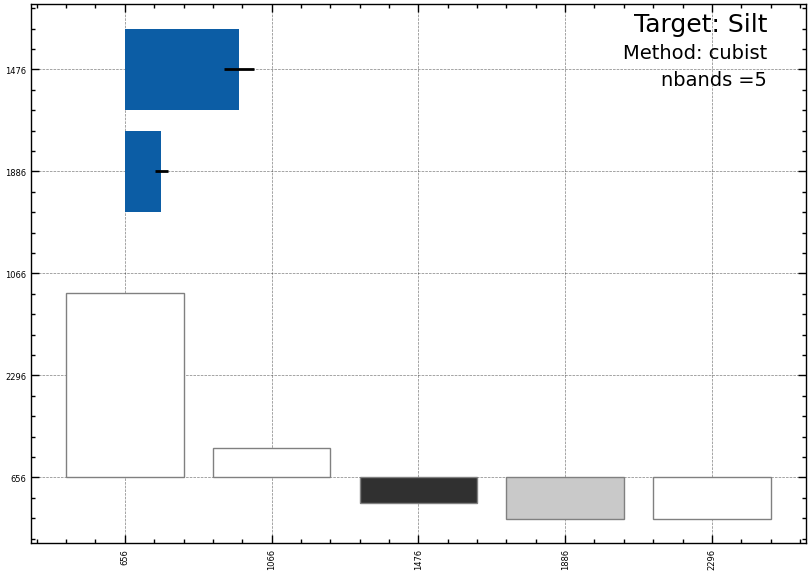

In [46]:
feature_scores['Silt'] = permutation_importance(silt_model_cubist, fod_sampled[5], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'cubist', 'spec': fod_sampled[5], 'spec_proc': 'fod2', 'n_bands': 5}
show_important_features_for ('Silt', model_details, feature_scores, 0.4, 12, 2)

#### Leave one out

Silt -> [ r2 - **0.42**, Spec - fod2, n_bands - 37]   <br/><br/>
***Description***:To obtain the best model for silt using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 37 bands.


In [47]:
silt_model_cubist = Cubist(n_committees = 10, n_rules = 10) 
silt_model_cubist.fit(fod_sampled[37],  T[1])

Cubist(n_committees=10, n_rules=10)

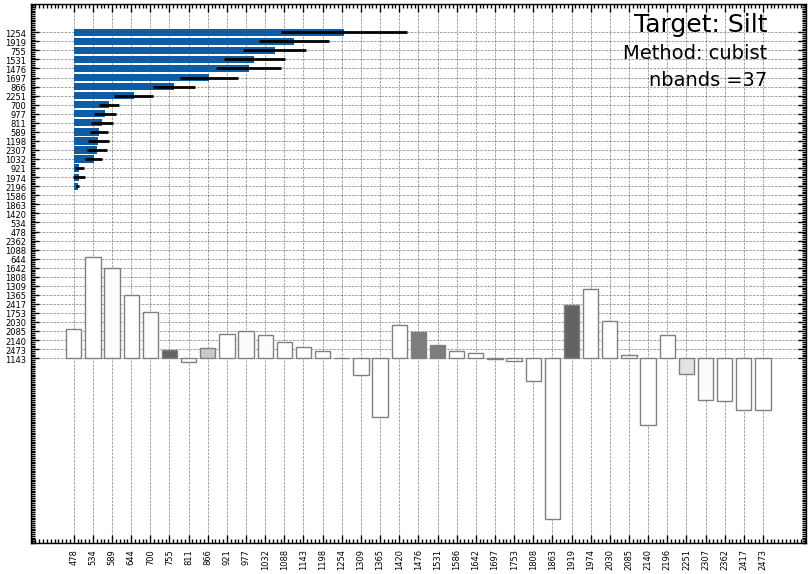

In [48]:
feature_scores['Silt'] = permutation_importance(silt_model_cubist, fod_sampled[37], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'cubist', 'spec': fod_sampled[37], 'spec_proc': 'fod2', 'n_bands': 37}
show_important_features_for ('Silt', model_details, feature_scores, 40, 150, 2)

### Gradient Boosting Regression Tree

#### Train test

Silt -> [ r2 - **0.54**, Spec - fod2, n_bands - 19]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 19 bands.


In [49]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)  
silt_model_gbrt.fit(fod_sampled[19],  T[1])

GradientBoostingRegressor(n_estimators=50, random_state=42)

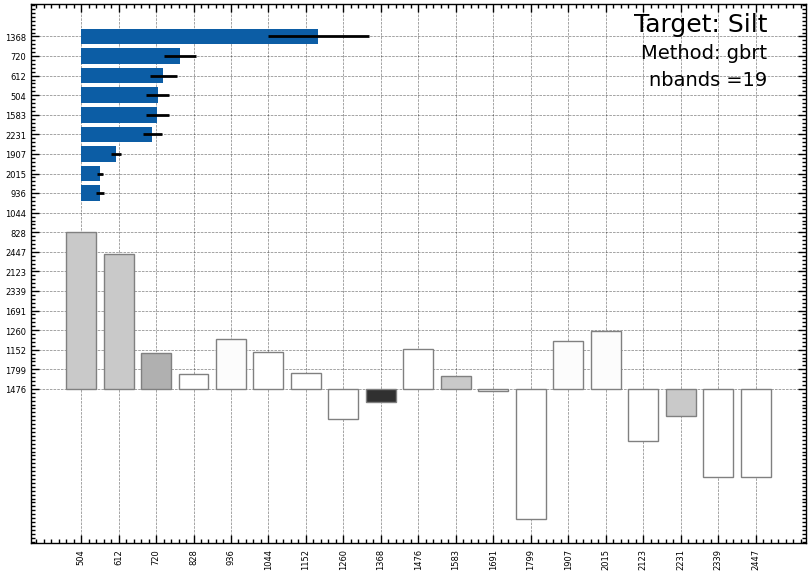

In [50]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled[19], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled[19], 'spec_proc': 'fod2', 'n_bands': 19}
show_important_features_for ('Silt', model_details, feature_scores, 20, 70, 2)

#### Leave one out

Silt -> [ r2 - **0.42**, Spec - fod2, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 70 bands.


In [51]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)  
silt_model_gbrt.fit(fod_sampled[70],  T[1])

GradientBoostingRegressor(n_estimators=50, random_state=42)

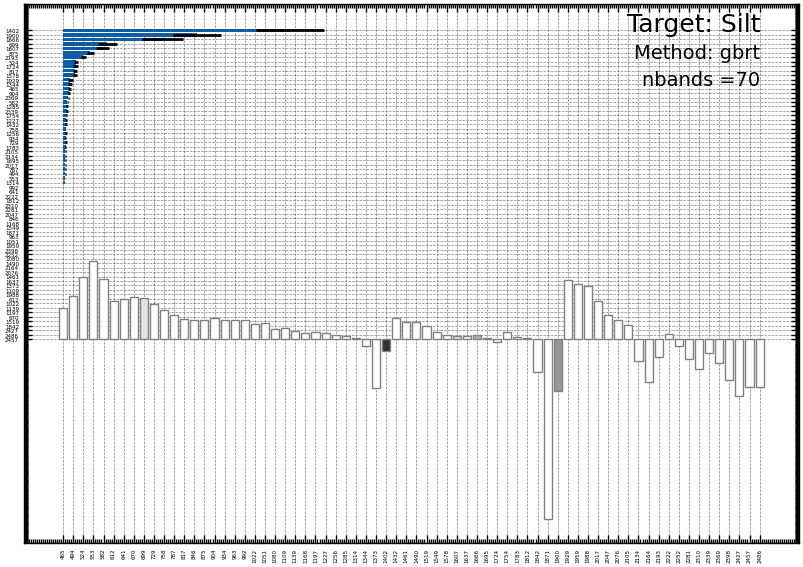

In [52]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled[70], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled[70], 'spec_proc': 'fod2', 'n_bands': 70}
show_important_features_for ('Silt', model_details, feature_scores, 80, 600, 20)

## Clay 

### PLSR

#### Train test

Clay -> [ r2 - **0.72**, Spec - log, n_bands - 39]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 39 bands.

In [53]:
clay_model_plsr = PLSRegression(n_components=4, scale=True) 
clay_model_plsr.fit(sampled_log[39],  T[2])

PLSRegression(n_components=4)

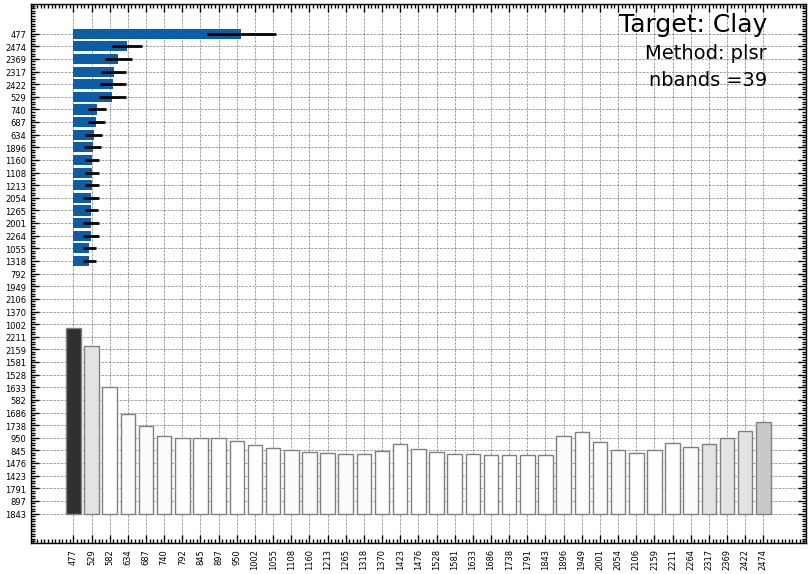

In [54]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log[39], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log[39], 'spec_proc': 'log', 'n_bands': 39}
show_important_features_for ('Clay', model_details, feature_scores, 20, 5, 2)

#### Leave one out

Clay -> [ r2 - **0.66**, Spec - log, n_bands - 15]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 15 bands.


In [55]:
clay_model_plsr = PLSRegression(n_components=10, scale=True)  
clay_model_plsr.fit(sampled_log[15],  T[2])

PLSRegression(n_components=10)

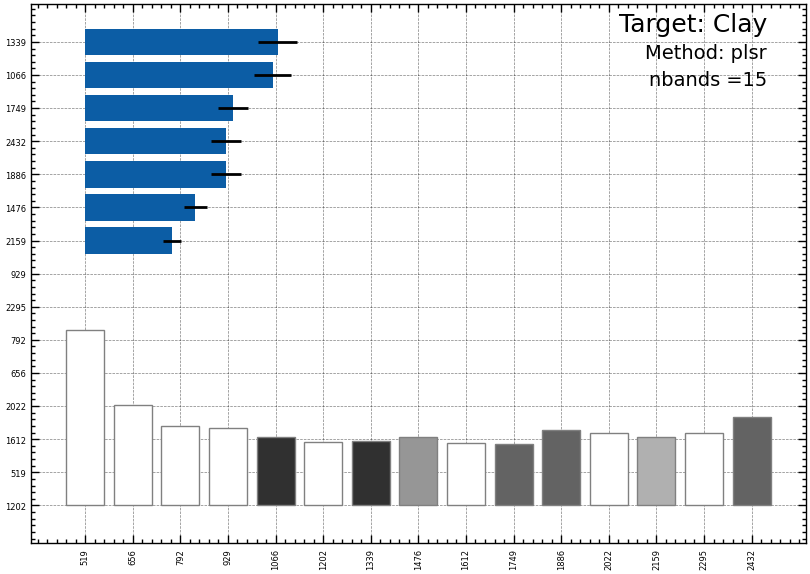

In [56]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log[15], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log[15], 'spec_proc': 'log', 'n_bands': 15}
show_important_features_for ('Clay', model_details, feature_scores, 0.007, 2, 2)

### SVR

#### Train test

Clay -> [ r2 - **0.68**, Spec - log, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for clay using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 70 bands.


In [57]:
clay_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')  
clay_model_svr.fit(sampled_log[70],  T[2])

SVR(C=10, gamma=0.01, kernel='linear')

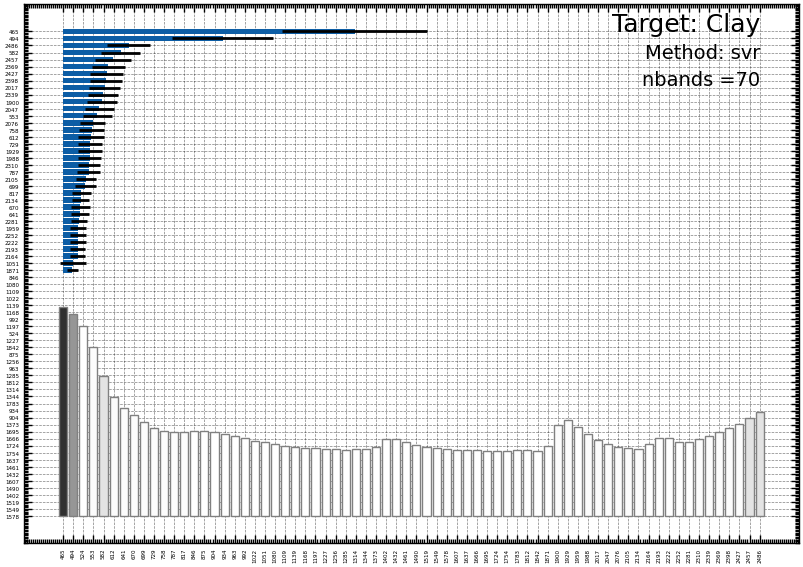

In [58]:
feature_scores['Clay'] = permutation_importance(clay_model_svr, sampled_log[70], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'svr', 'spec': sampled_log[70], 'spec_proc': 'log', 'n_bands': 70}
show_important_features_for ('Clay', model_details, feature_scores, 100, 10, 2)

#### Leave one out

Clay -> [ r2 - **0.63**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for clay using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


The best result is on 0 bands but the feature importance is plotted for 100 bands.

In [65]:
clay_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear') 
clay_model_svr.fit(sampled_log[100],  T[2])

SVR(C=10, gamma=0.01, kernel='linear')

In [66]:
feature_scores['Clay'] = permutation_importance(clay_model_svr, sampled_log[100], T[2], n_repeats=5, random_state=0)
model_details['Clay'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}

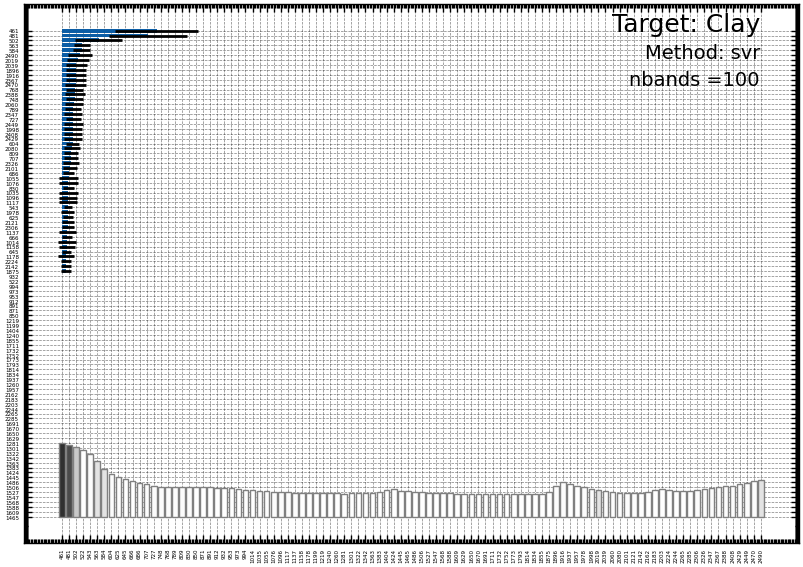

In [68]:
show_important_features_for ('Clay', model_details, feature_scores, 100, 5, 2)

### Kernel Ridge

#### Train test

Clay -> [ r2 - **0.72**, Spec - log, n_bands - 9]   <br/><br/>
***Description***:To obtain the best model for clay using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 9 bands.


In [69]:
clay_model_kernelridge = KernelRidge(alpha = 0.05) 
clay_model_kernelridge.fit(sampled_log[9],  T[2])

KernelRidge(alpha=0.05)

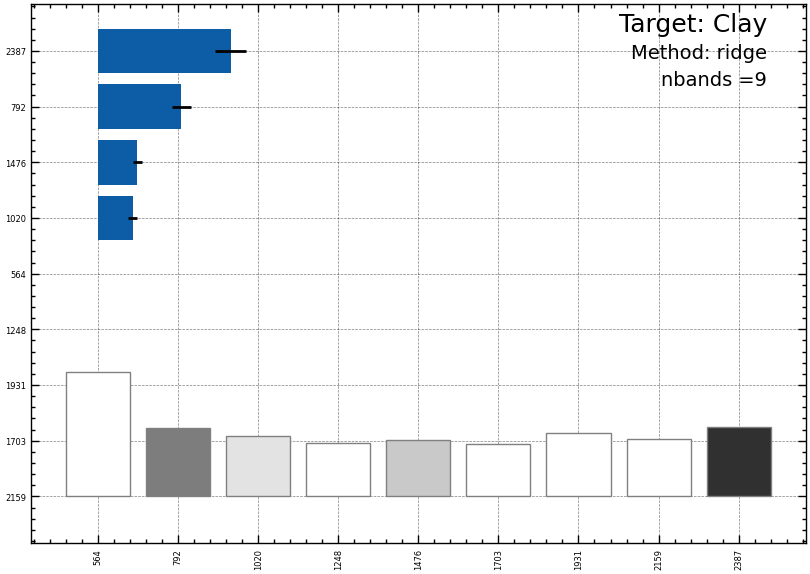

In [71]:
feature_scores['Clay'] = permutation_importance(clay_model_kernelridge, sampled_log[9], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'ridge', 'spec': sampled_log[9], 'spec_proc': 'log', 'n_bands': 9}
show_important_features_for ('Clay', model_details, feature_scores, 0.3, 1, 2)

#### Leave one out

Clay -> [ r2 - **0.6**, Spec - log, n_bands - 90]   <br/><br/>
***Description***:To obtain the best model for clay using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 90 bands.


In [72]:
clay_model_kernelridge = KernelRidge(alpha = 0.1) 
clay_model_kernelridge.fit(sampled_log[90],  T[2])

KernelRidge(alpha=0.1)

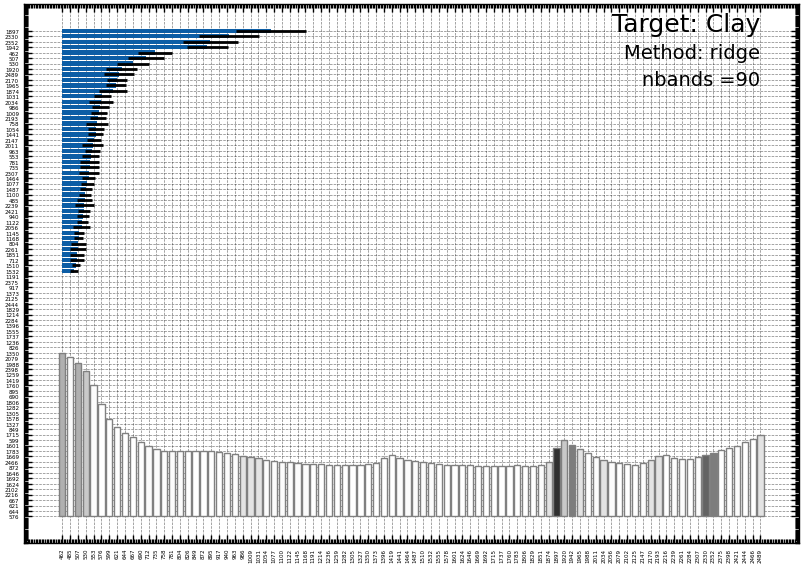

In [76]:
feature_scores['Clay'] = permutation_importance(clay_model_kernelridge, sampled_log[90], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'ridge', 'spec': sampled_log[90], 'spec_proc': 'log', 'n_bands': 90}
show_important_features_for ('Clay', model_details, feature_scores, 40, 10, 2)

### Cubist

#### Train test

Clay -> [ r2 - **0.72**, Spec - log, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 7 bands.


In [77]:
clay_model_cubist = Cubist( n_committees = 5, n_rules = 10)
clay_model_cubist.fit(sampled_log[7],  T[2])

Cubist(n_committees=5, n_rules=10)

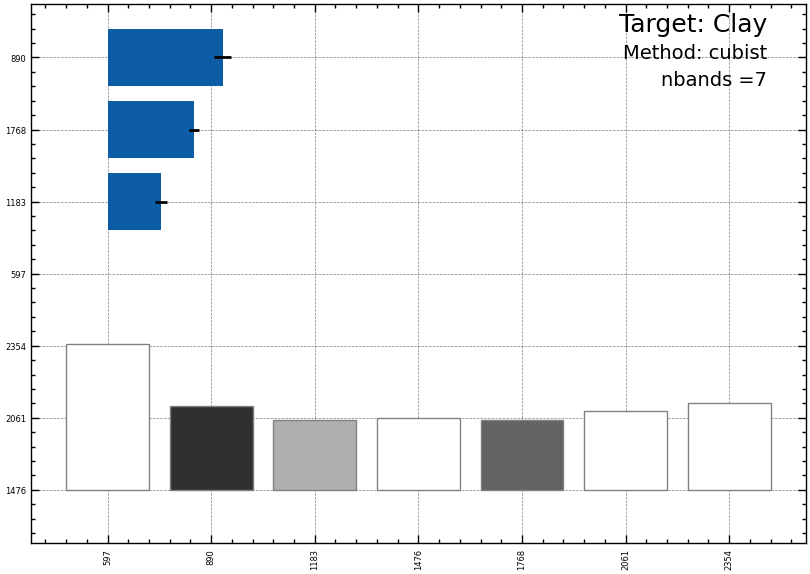

In [80]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, sampled_log[7], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Clay', model_details, feature_scores, 0.2, 1, 2)

#### Leave one out

Clay -> [ r2 - **0.67**, Spec - log, n_bands - 21]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 21 bands.


In [81]:
clay_model_cubist = Cubist( n_committees = 10, n_rules = 10)
clay_model_cubist.fit(sampled_log[21],  T[2])

Cubist(n_committees=10, n_rules=10)

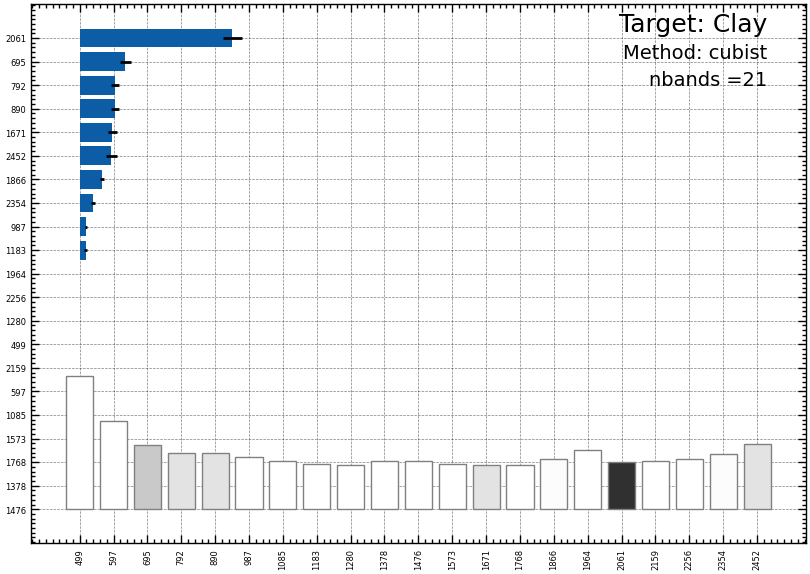

In [83]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, sampled_log[21], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': sampled_log[21], 'spec_proc': 'log', 'n_bands': 21}
show_important_features_for ('Clay', model_details, feature_scores, 1, 2, 2)

### Gradient Boosting Regression Tree

#### Train test

Clay -> [ r2 - **0.64**, Spec - fod2, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for clay using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 7 bands.


In [84]:
clay_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 50, random_state = 42)
clay_model_gbrt.fit(fod_sampled[7],  T[2])

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=42)

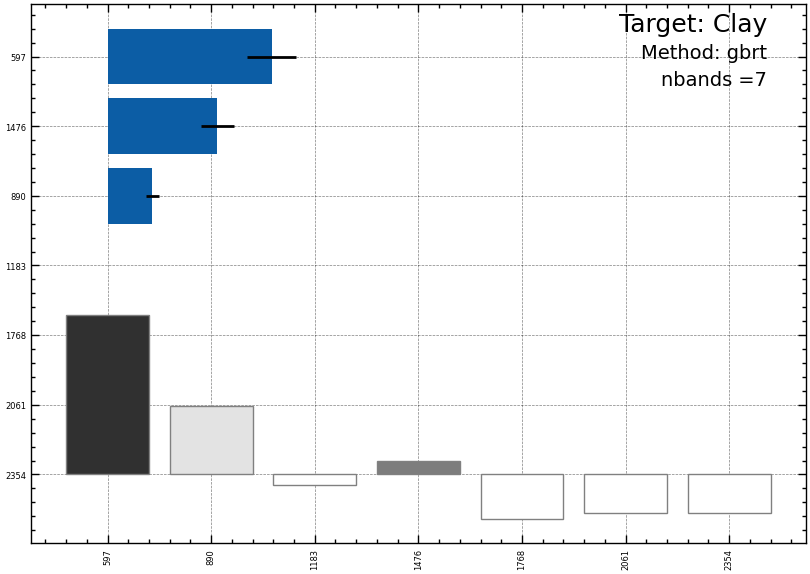

In [88]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, fod_sampled[7], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'gbrt', 'spec': fod_sampled[7], 'spec_proc': 'fod2', 'n_bands': 7}
show_important_features_for ('Clay', model_details, feature_scores, 2, 15, 2)

#### Leave one out

Clay -> [ r2 - **0.63**, Spec - fod2, n_bands - 90]   <br/><br/>
***Description***:To obtain the best model for clay using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 90 bands.


In [89]:
clay_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)
clay_model_gbrt.fit(fod_sampled[90],  T[2])

GradientBoostingRegressor(n_estimators=50, random_state=42)

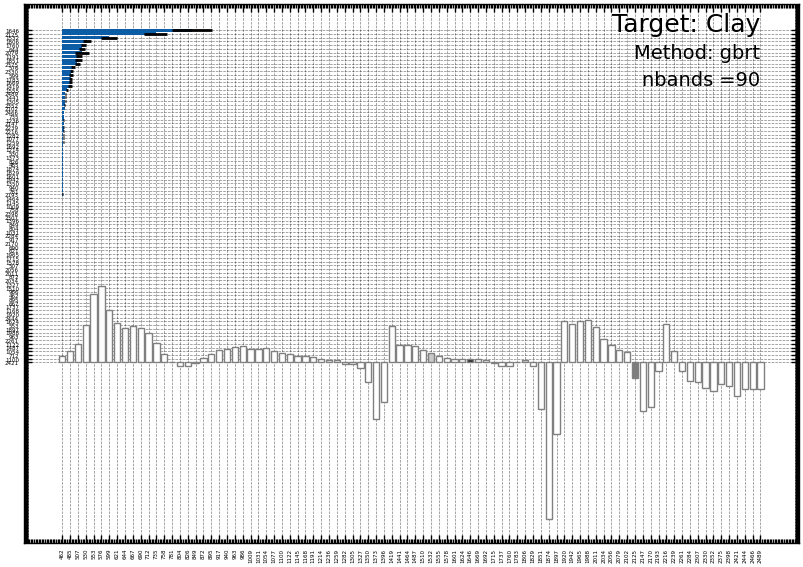

In [92]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, fod_sampled[90], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'gbrt', 'spec': fod_sampled[90], 'spec_proc': 'fod2', 'n_bands': 90}
show_important_features_for ('Clay', model_details, feature_scores, 100, 500, 2)

## TOC

### PLSR 

#### Train test

TOC -> [ r2 - **0.6**, Spec - log, n_bands - 39]   <br/><br/>
***Description***:To obtain the best model for TOC using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 39 bands.


In [93]:
TOC_model_plsr = PLSRegression(n_components=10, scale=True)
TOC_model_plsr.fit(sampled_log[39],  T[3])

PLSRegression(n_components=10)

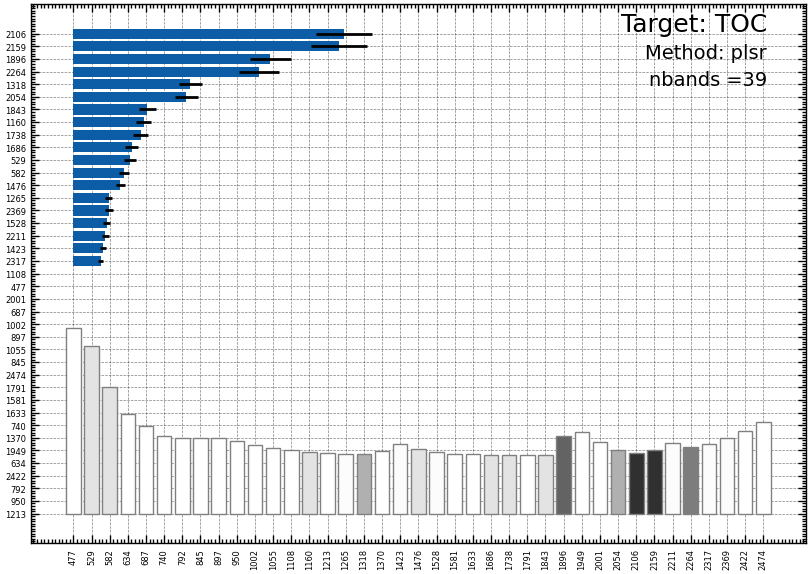

In [95]:
feature_scores['TOC'] = permutation_importance(TOC_model_plsr, sampled_log[39], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'plsr', 'spec': sampled_log[39], 'spec_proc': 'log', 'n_bands': 39}
show_important_features_for ('TOC', model_details, feature_scores, 0.1, 5, 2)

#### Leave one out

TOC -> [ r2 - **0.44**, Spec - log, n_bands - 25]   <br/><br/>
***Description***:To obtain the best model for TOC using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 25 bands.


In [96]:
TOC_model_plsr = PLSRegression(n_components=10, scale=True)
TOC_model_plsr.fit(sampled_log[25],  T[3])

PLSRegression(n_components=10)

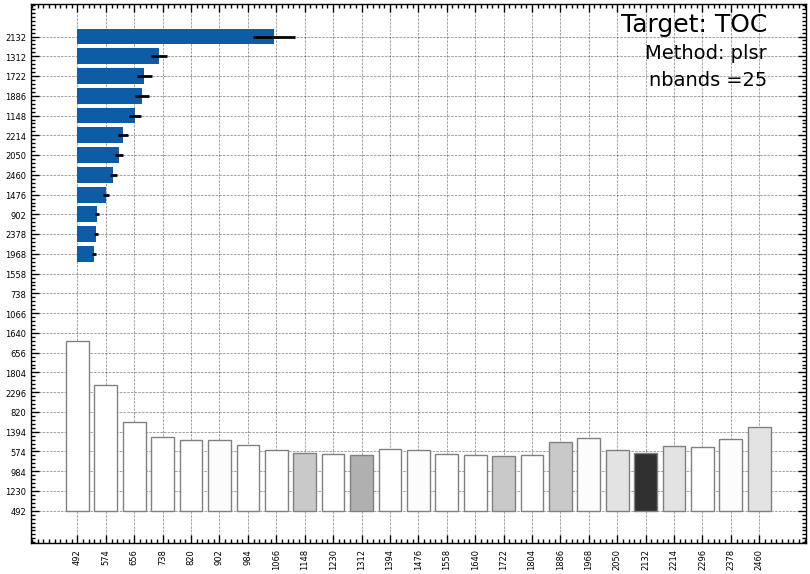

In [98]:
feature_scores['TOC'] = permutation_importance(TOC_model_plsr, sampled_log[25], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'plsr', 'spec': sampled_log[25], 'spec_proc': 'log', 'n_bands': 25}
show_important_features_for ('TOC', model_details, feature_scores, 0.01, 3, 2)

### SVR

#### Train test

TOC -> [ r2 - **0.58**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [99]:
TOC_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
TOC_model_svr.fit(sampled_log[100],  T[3])

SVR(C=10, gamma=0.01, kernel='linear')

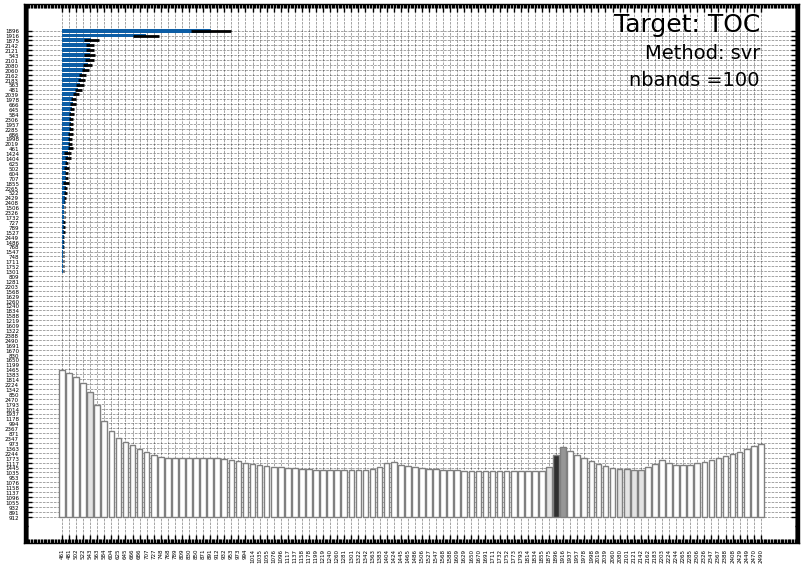

In [104]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 10,10, 2)

#### Leave one out

TOC -> [ r2 - **0.45**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [ ]:
TOC_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
TOC_model_svr.fit(sampled_log[100],  T[3])

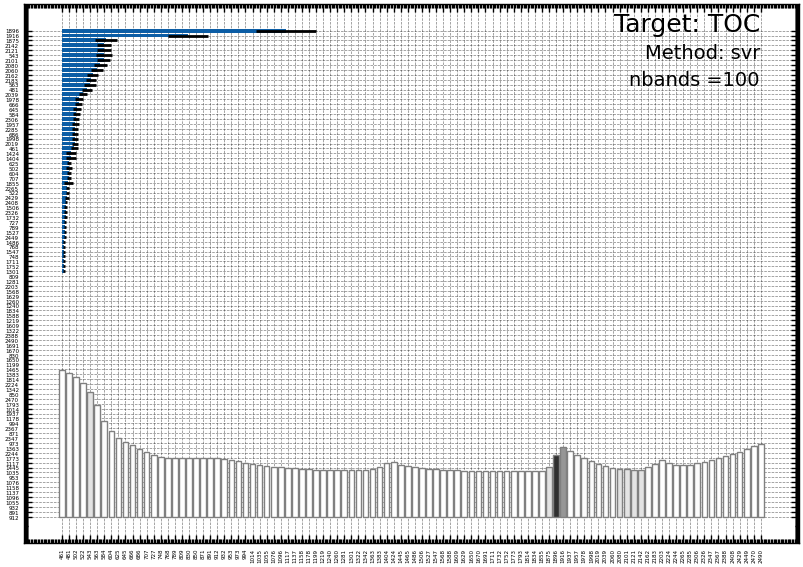

In [107]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 15, 10, 2)

###  Kernel Ridge

#### Train test

TOC -> [ r2 - **0.6**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using kernel ridge regression  method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [108]:
TOC_model_kernelridge = KernelRidge(alpha = 0.05) 
TOC_model_kernelridge.fit(sampled_log[100],  T[3])

KernelRidge(alpha=0.05)

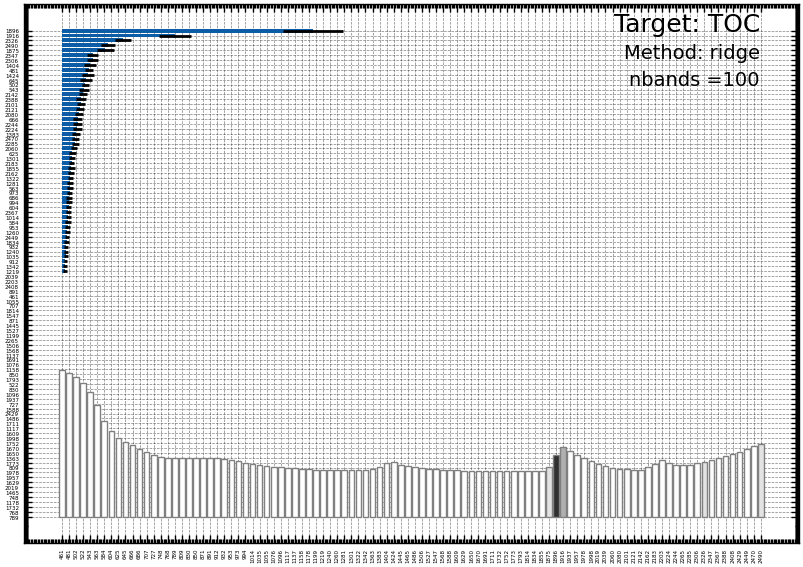

In [110]:
feature_scores['TOC'] = permutation_importance(TOC_model_kernelridge, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'ridge', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 10, 10, 2)

#### Leave one out

TOC -> [ r2 - **0.45**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [112]:
TOC_model_kernelridge = KernelRidge(alpha = 0.05) 
TOC_model_kernelridge.fit(sampled_log[100],  T[3])

KernelRidge(alpha=0.05)

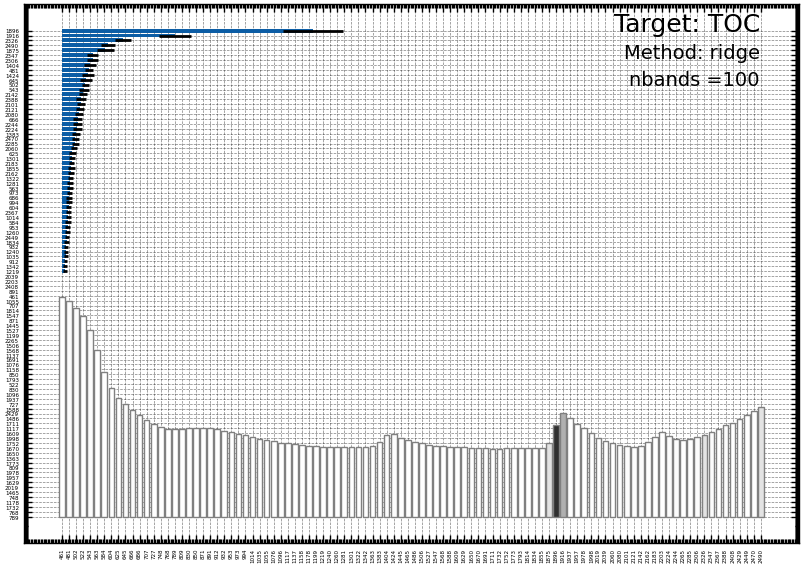

In [114]:
feature_scores['TOC'] = permutation_importance(TOC_model_kernelridge, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'ridge', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 10, 15, 2)

### Cubist

#### Train test

TOC -> [ r2 - **0.62**, Spec - fod2, n_bands - 45]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the first order derivative of the  smoothed spectra which is resampled to 45 bands.


In [115]:
TOC_model_cubist = Cubist(n_committees = 5, n_rules = 10) 
TOC_model_cubist.fit(fod_sampled[45],  T[3])

Cubist(n_committees=5, n_rules=10)

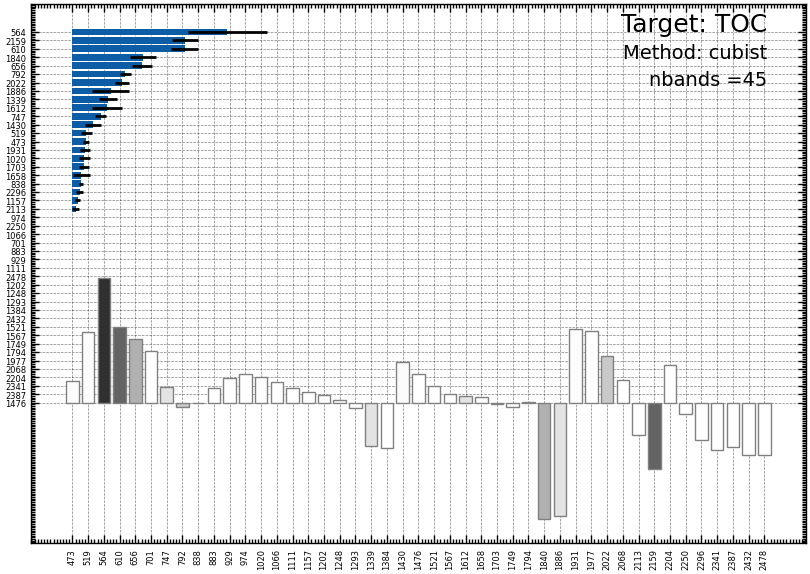

In [118]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, fod_sampled[45], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': fod_sampled[45], 'spec_proc': 'fod2', 'n_bands': 45}
show_important_features_for ('TOC', model_details, feature_scores, 30, 200, 2)

#### Leave one out

TOC -> [ r2 - **0.5**, Spec - log, n_bands - 39]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 39 bands.


In [119]:
TOC_model_cubist = Cubist(n_committees = 5, n_rules = 10)
TOC_model_cubist.fit(sampled_log[39],  T[3])

Cubist(n_committees=5, n_rules=10)

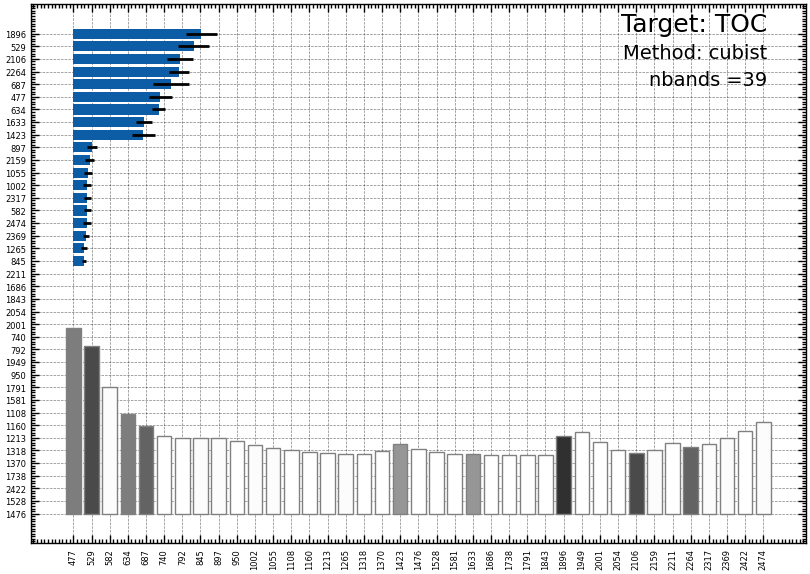

In [121]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, sampled_log[39], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': sampled_log[39], 'spec_proc': 'log', 'n_bands': 39}
show_important_features_for ('TOC', model_details, feature_scores, 10, 5, 2)

### Gradient Boosting Regression Tree

#### Train test

TOC -> [ r2 - **0.64**, Spec - none, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the smoothed spectra which is resampled to 0 bands.


In [122]:
TOC_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42)
TOC_model_gbrt.fit(sampled_spec[100],  T[3])

GradientBoostingRegressor(n_estimators=30, random_state=42)

In [ ]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, sampled_spec[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'gbrt', 'spec': sampled_spec[100], 'spec_proc': 'none', 'n_bands': 100}

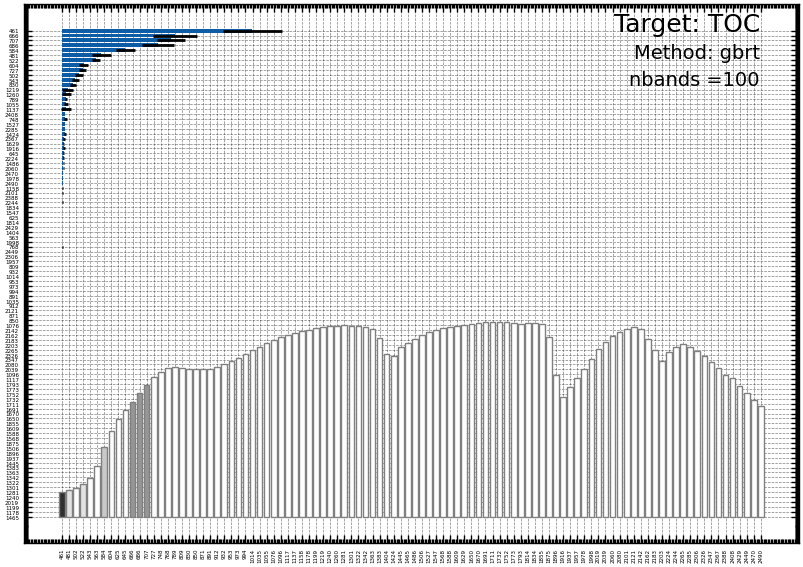

In [130]:
show_important_features_for ('TOC', model_details, feature_scores, 100, 100, 2)

#### Leave one out

TOC -> [ r2 - **0.54**, Spec - fod2, n_bands - 50]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the first order derivative of the  smoothed spectra which is resampled to 50 bands.


In [131]:
TOC_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42)
TOC_model_gbrt.fit(fod_sampled[50],  T[3])

GradientBoostingRegressor(n_estimators=30, random_state=42)

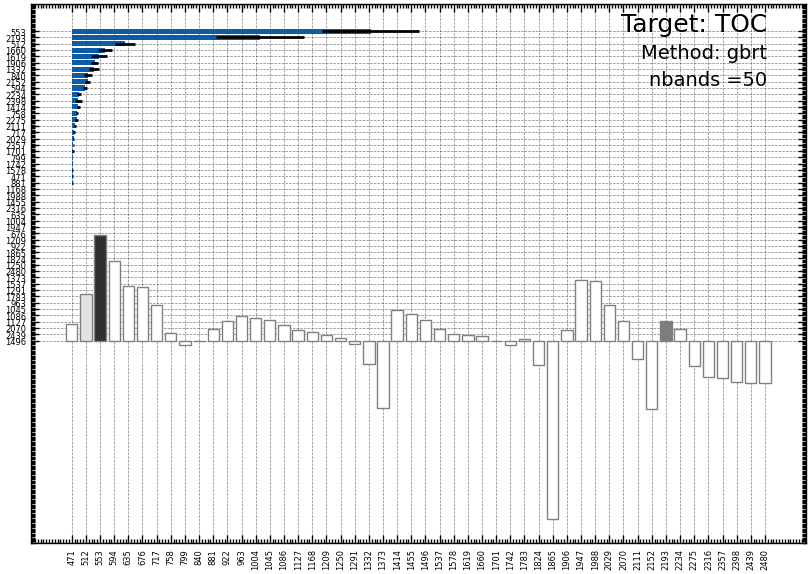

In [133]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, fod_sampled[50], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'gbrt', 'spec': fod_sampled[50], 'spec_proc': 'fod2', 'n_bands': 50}
show_important_features_for ('TOC', model_details, feature_scores, 40, 250, 2)

In [134]:
HMtree['plsr']['CaCO3']['none']['log'][7]

{'bp': {'n_components': 5},
 'X_test':          597       890      1183      1476      1768      2061      2354
 76  1.225323  0.742534  0.606954  0.573601  0.547203  0.607304  0.685214
 0   1.943961  1.130602  0.885943  0.845219  0.795006  0.861571  0.926086
 71  1.305384  0.790578  0.648475  0.617752  0.585697  0.653051  0.726909
 23  2.054064  1.448461  1.261749  1.273607  1.266985  1.384127  1.477483
 12  1.451207  0.895467  0.747288  0.741382  0.712678  0.770252  0.831222
 57  0.554233  0.249350  0.186233  0.185986  0.176312  0.248165  0.349005
 10  0.909731  0.446477  0.276906  0.235148  0.202974  0.258270  0.338869
 19  1.051681  0.671729  0.512941  0.494712  0.481794  0.568014  0.656528
 4   1.954381  1.460912  1.416263  1.475050  1.459033  1.534887  1.606629
 68  0.652694  0.327732  0.259720  0.249760  0.242516  0.292827  0.393481
 62  1.364093  0.887503  0.624032  0.536057  0.486116  0.540764  0.604175
 65  1.443809  1.029698  0.851954  0.841308  0.825812  0.934208  1.018534


## CaCO3

### PLSR

#### Train test

CaCO3 -> [ r2 - **0.67**, Spec - log, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 7 bands.


In [135]:
CaCO3_model_plsr = PLSRegression(n_components=5, scale=True)
CaCO3_model_plsr.fit(sampled_log[7],  T[4])

PLSRegression(n_components=5)

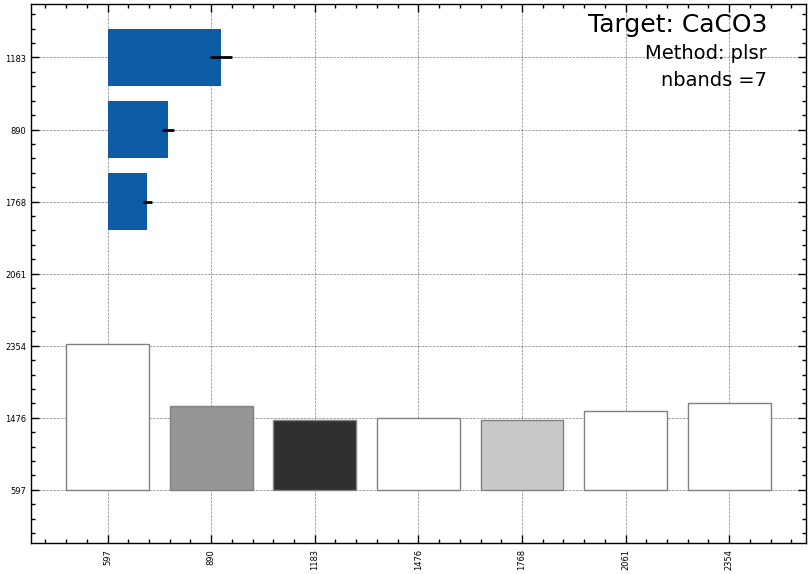

In [145]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, sampled_log[7], T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('CaCO3', model_details, feature_scores, 0.005, 1, 2)

#### Leave one out

In [146]:
TOC -> [ r2 - **0.64**, Spec - none, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the smoothed spectra which is resampled to 0 bands.


SyntaxError: invalid syntax (1687273249.py, line 1)

In [ ]:
TOC_model_gbrt = PLSRegression(n_components=10, scale=True)
TOC_model_gbrt.fit(fod_sampled[50],  T[3])

In [ ]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, fod_sampled[50], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'gbrt', 'spec': fod_sampled[50], 'spec_proc': 'fod2', 'n_bands': 50}
show_important_features_for ('TOC', model_details, feature_scores, 0.2, 10, 2)

## CaCO3 -> [ r2 - **0.66**, Spec - fod2, n_bands - 27] :   **cubist**   <br/><br/>
***Description***: We get the best model of CaCO3 when we use cubist method. \
While training the model we utilize the first order derivative which is resampled to 27 bands.


In [ ]:
CaCO3_model_cubist = Cubist(n_committees = 10, n_rules = 10)  
CaCO3_model_cubist.fit(fod_sampled[27],  T[4])

In [ ]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled[27], T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled[27], 'spec_proc': 'fod2', 'n_bands': 27}
show_important_features_for ('CaCO3', model_details, feature_scores, 5, 40, 1)

In [ ]:
 Sand -> [ iqrp - 3.05, r2 - 0.69, Spec - fod, n_bands - 24, Tar - minmax] : gbrt

sand_model_gbrt = GradientBoostingRegressor()  
sand_model_gbrt.fit(sampled_fod[24], T[0])

In [ ]:
sampled_fod[24].head(1)

In [ ]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, sampled_fod[24], T[0], n_repeats=20, random_state=0)

model_details['Sand'] = {'method': 'gbrt', 'spec': sampled_fod[24], 'spec_proc': 'fod', 'n_bands': 24}

In [ ]:
show_important_features_for ('Sand', model_details, feature_scores, 10, 9000, 1)

###  Silt 

In [ ]:
# For:Silt-> ['r2', 0.5, 'Spec:', 'fod2', 'bands:', 12, 'Tar:', 'none'] :randomforest

Silt -> [ iqrp - **2.04**, r2 - **0.5**, Spec - fod2, n_bands - 12, Tar - none] :   **random**  <br/><br/>
***Description***: We get the best model for silt when we use randomforest method. \
While training the model we utilize the first order derivative (of the smoothed spectra which is resampled to 12 bands) and
silt values are used without any preprocessing.

In [ ]:
silt_model_rand = RandomForestRegressor(random_state= 23)
silt_model_rand.fit(fod_sampled[12], T[1])

In [ ]:
fod_sampled[12].head(1)

In [ ]:
feature_scores['Silt'] = permutation_importance(silt_model_rand, fod_sampled[12], T[1], n_repeats=20, random_state=0)

In [ ]:
model_details['Silt'] = {'method': 'rand', 'spec': fod_sampled[12], 'spec_proc': 'fod2', 'n_bands': 12}

show_important_features_for ('Silt', model_details, feature_scores, 5, 10, 5)

##  Clay

Clay -> [ iqrp - **2.99**, r2 - **0.77**, Spec - log, n_bands - 15, Tar - minmax] :   **mult**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the inverse logarithmic reflectance (1/logR) of the smoothed spectra which is resampled to 15 bands and clay values are used by  normalizing it in the range of 0-10.

Clay -> [ iqrp - **2.97**, r2 - **0.77**, Spec - continuum, n_bands - 30, Tar - minmax] :   **gbrt**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the continum removed smoothed spectra which is resampled to 30 bands and clay values are used by  normalizing it in the range of 0-10.

In [ ]:
clay_model_mult = linear_model.LinearRegression()
clay_model_mult.fit(sampled_log[15], NT[2])

In [ ]:
sampled_log[15].head(1)

In [ ]:
feature_scores['Clay'] = permutation_importance(clay_model_mult, sampled_log[15], NT[2], n_repeats=20, random_state=0)

model_details['Clay'] = {'method': 'mult', 'spec': sampled_log[15], 'spec_proc': 'log', 'n_bands': 15}

In [ ]:
show_important_features_for ('Clay', model_details, feature_scores, 0.001, 1, 2)

In [ ]:
# For:Clay-> ['r2', 0.77, 'Spec:', 'continuum', 'bands:', 30, 'Tar:', 'minmax'] :gbrt
clay_model_gbrt = GradientBoostingRegressor()
clay_model_gbrt.fit(sampled_cr[30], NT[2])

In [ ]:
sampled_cr[30].head(1)

In [ ]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, sampled_cr[30], NT[2], n_repeats=20, random_state=0)

model_details['Clay'] = {'method': 'gbrt', 'spec': sampled_cr[30], 'spec_proc': 'continuum', 'n_bands': 30}

In [ ]:
show_important_features_for ('Clay', model_details, feature_scores, 20, 150, 2)

##  TOC 

In [ ]:
# For:TOC-> ['iqrp', 2.51, 'Spec:', 'fod2', 'bands:', 40, 'Tar:', 'minmax'] :gbrt
# For:TOC-> ['r2', 0.81, 'Spec:', 'fod2', 'bands:', 40, 'Tar:', 'minmax'] :gbrt

TOC -> [ iqrp - **2.51**, r2 - **0.81**, Spec - fod2, n_bands - 40, Tar - minmax] :   **gbrt**  <br/><br/>
***Description***: We get the best model for TOC when we use gbrt (gradient boosted regression tree) method. \
While training the model we utilize the fod (of the smoothed spectra which is resampled to 55 bands) and
TOC values are used by  normalizing it in the range of 0-10.

In [ ]:
TOC_model_gbrt = GradientBoostingRegressor() 
TOC_model_gbrt.fit(fod_sampled[40], NT[3])

In [ ]:
fod_sampled[40].head(1)

In [ ]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, fod_sampled[40], NT[3], n_repeats=20, random_state=0)

model_details['TOC'] = {'method': 'gbrt', 'spec': fod_sampled[40], 'spec_proc': 'fod2', 'n_bands': 40}

In [ ]:
show_important_features_for ('TOC', model_details, feature_scores, 50, 70, 55)

##  CaCO3 

In [ ]:
#For:CaCO3-> ['iqrp', 2.32, 'Spec:', 'none', 'bands:', 3, 'Tar:', 'none'] :gbrt
#For:CaCO3-> ['r2', 0.6, 'Spec:', 'none', 'bands:', 3, 'Tar:', 'none'] :gbrt

CaCO3 -> [ iqrp - **2.32**, r2 - **0.6**, Spec - none, n_bands - 3, Tar - none] :   **gbrt**  <br/><br/>
***Description***: We get the best model for CaCO3 when we use gbrt (gradient boosted regression tree ) method. \
While training the model we utilize the smoothed spectra which is resampled to 3 bands and
CaCO3 values are used without any preprocessing.

In [ ]:
CaCO3_model_gbrt = GradientBoostingRegressor()
CaCO3_model_gbrt.fit(sampled_spec[3], T[4])

In [ ]:
sampled_spec[3].head(1)

In [ ]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, sampled_spec[3], T[4], n_repeats=20, random_state=0)

model_details['CaCO3'] = {'method': 'gbrt', 'spec': sampled_spec[3], 'spec_proc': 'spectra', 'n_bands': 3}

In [ ]:
show_important_features_for ('CaCO3', model_details, feature_scores, 0.02, 0.5, 3)

In [ ]:
ipywidgets.interact(show_important_features_for, tar = target_names, model_details = [model_details], 
                    feature_scores = [feature_scores], r_factor = (0,100,0.01), X_factor = (0,1000,1), sample = (0,50,1))
                    
